In [12]:
import nltk

In [13]:
with open("input.txt") as fh:
    document = fh.read()

In [14]:
unwanted = nltk.corpus.stopwords.words("english")
unwanted.extend([w.lower() for w in nltk.corpus.names.words()])

def skip_unwanted(pos_tuple):
    word, tag = pos_tuple
    if not word.isalpha() or word in unwanted:
        return False
    if tag.startswith("NN"):
        return False
    return True

positive_words = [word for word, tag in filter(
    skip_unwanted,
    nltk.pos_tag(nltk.corpus.movie_reviews.words(categories=["pos"]))
)]
negative_words = [word for word, tag in filter(
    skip_unwanted,
    nltk.pos_tag(nltk.corpus.movie_reviews.words(categories=["neg"]))
)]

words = [w for w in nltk.word_tokenize(document) if w.isalpha() and w not in unwanted]

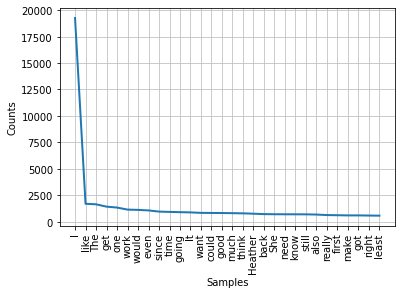

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [15]:
fd = nltk.FreqDist(words)
fd.plot(30)

In [27]:
from nltk.sentiment import SentimentIntensityAnalyzer
from statistics import mean

sia = SentimentIntensityAnalyzer()
sentences = nltk.sent_tokenize(document)
sentiments = [sia.polarity_scores(s) for s in sentences]
positive_sentiments = mean([s["pos"] for s in sentiments])
neutral_sentiments = mean([s["neu"] for s in sentiments])
negative_sentiments = mean([s["neg"] for s in sentiments])
overall = mean([s['compound'] for s in sentiments])

In [28]:
print(f"positive: {positive_sentiments}")
print(f"neutral:  {neutral_sentiments}")
print(f"negative: {negative_sentiments}")
print(f"overall:  {overall}")

positive: 0.09589792919785115
neutral:  0.8450666238119289
negative: 0.05903783461132284
overall:  0.10637421828366775


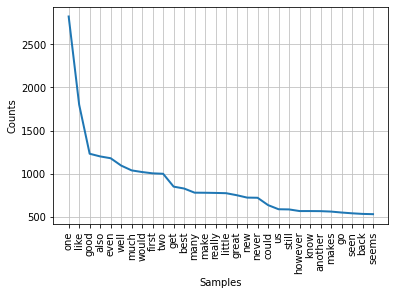

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [19]:
positive_fd = nltk.FreqDist(positive_words)
positive_fd.plot(30)

In [22]:
print(len(positive_words))

174734


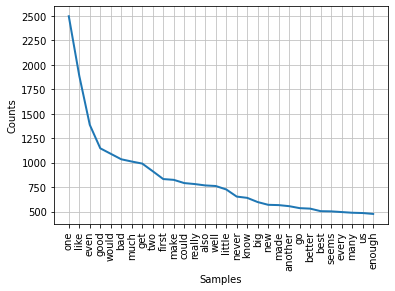

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [20]:
negative_fd = nltk.FreqDist(negative_words)
negative_fd.plot(30)

In [21]:
print(len(negative_words))

156310


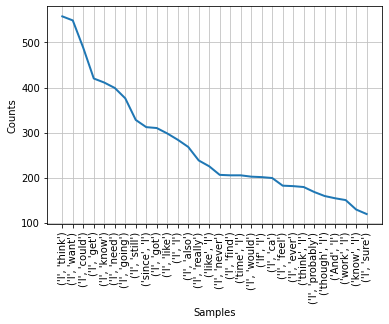

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [24]:
bigrams = nltk.BigramCollocationFinder.from_words(words)
bigrams.ngram_fd.plot(30)